In [19]:
import pandas as pd

data = pd.read_csv('../data/processed/processed.csv')

In [20]:
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering, Birch, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture

methods = {
     'AC': AgglomerativeClustering(),
     'k-Means' : KMeans(), 
     'SC': SpectralClustering(), 
     'Birch': Birch(),
     'DBSCAN': DBSCAN(), 
     'MeanShift': MeanShift(),
}

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

scores = []
iterations_per_method = 100

for index, method in enumerate(methods.values()):
    for iteration in range(iterations_per_method): 
        prediction = method.fit_predict(X=data)
        sc = silhouette_score(data, prediction)
        db = davies_bouldin_score(data, prediction)
        ch = calinski_harabasz_score(data, prediction)
        scores.append((index, iteration, sc, db, ch))

In [22]:
import numpy as np

methods_ids, iteration_numbers,silhouette_scores_all, davies_bouldin_scores_all, calinski_harabasz_scores_all  = zip(*scores)

silhouette_scores_by_method = [[]for i in range(len(methods))]
davies_bouldin_scores_by_method = [[]for i in range(len(methods))]
calinski_harabasz_scores_by_method = [[]for i in range(len(methods))]

for i, method_id in enumerate(methods_ids):
    silhouette_scores_by_method[method_id].append(silhouette_scores_all[i])
    davies_bouldin_scores_by_method[method_id].append(davies_bouldin_scores_all[i])
    calinski_harabasz_scores_by_method[method_id].append(calinski_harabasz_scores_all[i])

In [23]:
silhouette_score_avg_per_method = [sum(score_list)/len(score_list) for score_list in silhouette_scores_by_method]
davies_bouldin_score_avg_per_method = [sum(score_list)/len(score_list) for score_list in davies_bouldin_scores_by_method]
calinski_harabasz_score_avg_per_method = [sum(score_list)/len(score_list) for score_list in calinski_harabasz_scores_by_method]

silhouette_score_std_per_method = [np.std(score_list) for score_list in silhouette_scores_by_method]
davies_bouldin_score_std_per_method = [np.std(score_list) for score_list in davies_bouldin_scores_by_method]
calinski_harabasz_score_std_per_method = [np.std(score_list) for score_list in calinski_harabasz_scores_by_method]



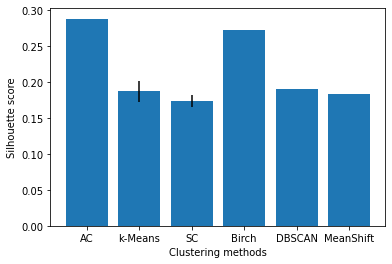

In [30]:
import matplotlib.pyplot as plt

methods_x_axis = [i for i in range(len(methods))]

plt.bar(methods_x_axis, silhouette_score_avg_per_method, yerr=silhouette_score_std_per_method)
plt.xlabel('Clustering methods')
plt.ylabel('Silhouette score')
plt.xticks([i for i in range(len(methods))], methods.keys())
plt.savefig("../results/First Evaluation/silhouette_scores")
plt.show()


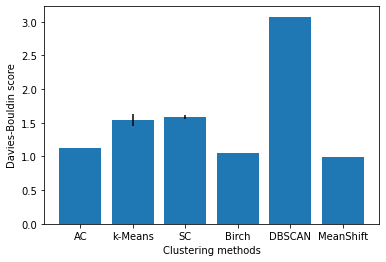

In [31]:
plt.bar(methods_x_axis, davies_bouldin_score_avg_per_method, yerr=davies_bouldin_score_std_per_method)
plt.xlabel('Clustering methods')
plt.ylabel('Davies-Bouldin score')
plt.xticks([i for i in range(len(methods))], methods.keys())
plt.savefig("../results/First Evaluation/davies_bouldin_score")
plt.show()


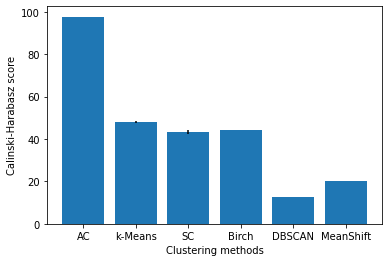

In [32]:
plt.bar(methods_x_axis, calinski_harabasz_score_avg_per_method, yerr=calinski_harabasz_score_std_per_method)
plt.xlabel('Clustering methods')
plt.ylabel('Calinski-Harabasz score')
plt.xticks([i for i in range(len(methods))], methods.keys())
plt.savefig("../results/First Evaluation/calinski_harabasz_score")
plt.show()
